# Assignment 8: Machine Learning
**Student Name: Beeta Samad**<br>
**Roll Number: 181210016**

In [168]:
try:
    from google.colab import drive
    %tensorflow_version 2.x COLAB = True print("Assignment 8")
    print("Note: using Google CoLab")
except:
    print("Assignment 8")
    print("Note: not using Google CoLab")
    COLAB = False

print("Name: Beeta Samad")
print("Roll Number: 181210016")

Assignment 8
Note: not using Google CoLab
Name: Beeta Samad
Roll Number: 181210016


In [336]:
#importing neccessary packages:
import numpy as np
import pandas as pd

In [170]:
!gdown --id 1bAiEbIkFF2Ular9Jka_ABJ8QIJuG4jGH

Downloading...
From: https://drive.google.com/uc?id=1bAiEbIkFF2Ular9Jka_ABJ8QIJuG4jGH
To: D:\Desktop Files\Beeta\College\6th Semester - Study Materials\Data Mining\Lab\Lab8\Assignment\sample_dataset.csv

  0%|          | 0.00/23.9k [00:00<?, ?B/s]
100%|##########| 23.9k/23.9k [00:00<00:00, 1.67MB/s]
[Errno 13] Permission denied: 'sample_dataset.csv'


In [793]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import preprocessing
from sklearn import metrics

# PART A : Linear Regression 
**(and Multiple Regression for the final task)**

In [848]:
def htheta(X, theta):
    return np.dot(X, theta)

In [849]:
def calculate_cost(X, y, theta):
    m = len(X)
    total_cost = np.sum(np.square(np.dot(X, theta) - y))
    total_cost = (1/(2*m))*total_cost
    return total_cost        

In [850]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    alpha = learning_rate
    m = len(X)
    cost_history = []
    clf = LinearRegression()
    clf.fit(X, y)
    for iter in range(iterations):
        theta = theta - (alpha/m)*(X.transpose().dot(np.dot(X, theta) - y))
        cost_history.append(calculate_cost(X, y, theta))
    return (clf.coef_, cost_history)

In [851]:
def predict(X, theta):
    return htheta(X, theta)

In [852]:
def linear_regression(X, y, learning_rate, iterations):
    X = np.insert(X, 0, [0 for elem in range(len(X))], axis=1)
    theta = [0, 0] # initial -> [intercept, slope]
    (theta, cost_history) = gradient_descent(X, y, theta, 
                                             learning_rate, iterations)
    slope = theta[1]
    intercept = theta[0]
    return (slope, intercept, cost_history[len(cost_history)-1])    

In [853]:
def multiple_regression(X, y, learning_rate, iterations):
    X = np.insert(X, 0, [0 for elem in range(len(X))], axis=1)
    theta = [0 for elem in range(len(X[0]))]
    (theta, cost_history) = gradient_descent(X, y, theta, 
                                             learning_rate, iterations)
    return theta, cost_history[len(cost_history)-1]

In [624]:
#Generating random data:
X = []
y = []
for x in range(111): 
    X.append([x])
    y.append(x)

print("Input datas: ")
print("X:", X)
print("y:", y)
#Applying linear regression on this random data:
(slope, intercept, cost) = linear_regression(X, y, 0.00003, 1500)

#Printing the results:
print("Slope:", slope)
print("Intercept:", intercept)
print("Cost:", cost)

Input datas: 
X: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110]]
y: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8

# PART B : Logistic Regression

In [466]:
def split_data(df, percentage=0.8):
    train=df.sample(frac=percentage, random_state=200) #random state is a seed value
    test=df.drop(train.index)
    return train, test

In [677]:
# loading the data:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")
X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

In [678]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [797]:
#1. Sigmoid function:
def sigmoid(x):
    return 1/(1 + np.exp(-1*x))

In [815]:
def model(X, Y, learning_rate, iterations):
  m = X.shape[1]
  n = X.shape[0]
  W = np.zeros((n,1))
  B = 0
  cost_list = []
  for i in range(iterations):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    # cost function
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
    # Gradient Descent
    dW = (1/m)*np.dot(A-Y, X.T)
    dB = (1/m)*np.sum(A - Y)
    W = W - learning_rate*dW.T
    B = B - learning_rate*dB
    # Keeping track of our cost function value
    cost_list.append(cost)
  return W, B, cost_list

In [816]:
def cost(htheta, y):
    return -np.log(htheta) if y == 1 else -np.log(1-htheta)

In [817]:
def htheta(X, theta):
    return np.dot(X, theta)

In [818]:
def hypo(X, theta):
    return sigmoid(np.dot(X, theta))

In [819]:
def compute_cost(X, y, theta):
    #print("inside compute cost: ", X, y, theta)
    #print("theta", theta)
    m = X.shape[0]
    htheta = hypo(X, theta)
    total_cost = (1/m)*np.dot(-y, np.log(htheta)) - np.dot((1-y), np.log(1-htheta))
    return total_cost

In [823]:
def gradient_descent(X, y, learning_rate, iterations):
    alpha = learning_rate
    m = X.shape[0]
    #cost_history = []
    theta = np.zeros((X.shape[1],))
    scaler = preprocessing.StandardScaler().fit(X)
    X = scaler.transform(X)
    #clf = LogisticRegression(max_iter=10000).fit(X, y)
    for iter in range(10_000):
        theta = theta - (alpha/m)*np.dot(X.transpose(), (hypo(X, theta) - y))
        #cost = compute_cost(X, y, theta)
        #print(cost)
        #print("theta", theta)
        #cost_history.append(cost)
    W, B, cost_history = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)
    #print(W, B)
    theta = np.insert(W, 0, B, axis=0)
    #print("theta: ", theta)
    #theta = clf.coef_[0]
    #cost = compute_cost(X, y, theta)
    return (theta, cost_history)

In [821]:
def predict(X, theta):
    return np.round(sigmoid(np.dot(X.T, theta)))

In [766]:
df = pd.read_csv("sample_dataset.csv")
train, test = split_data(df, 0.8)

In [789]:
X = np.array(train[cols[0:len(cols)-1]].values.tolist())
y = np.array(train[cols[len(cols)-1]].values.tolist())


In [790]:
iterations = 100_000
learning_rate = 5e-4
initial_cost = compute_cost(X, y, params)

(params_optimal, cost_history) = gradient_descent(X, y,  
                                                  learning_rate,
                                                  iterations)
print("cost:", cost_history[len(cost_history)-1])
print("theta: ", params_optimal)

cost: 0.4551779027210315
theta:  [[ 0.40017697]
 [-0.59203288]
 [ 2.28111478]
 [-0.01756912]
 [-0.28143993]
 [-0.05550195]
 [ 0.00726924]
 [-0.00746496]]


In [796]:
X = np.array(test[cols[0:len(cols)-1]].values.tolist())
y = np.array(test[cols[len(cols)-1]].values.tolist())

summation = np.square(predict(X.T, params_optimal)-y)
unique, counts = np.unique(summation, return_counts=True)
counts = dict(zip(unique, counts))

print("prediction accuracy: ", counts[0]/(counts[0]+counts[1]))

prediction accuracy:  0.44434137291280146


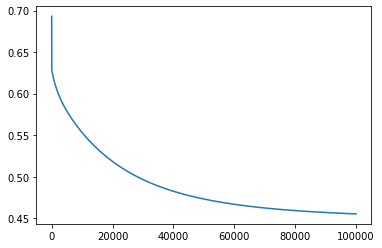

In [795]:
#plot showing cost with iterations:
plt.plot(np.arange(iterations), cost_history)
plt.show()

# PART C : Traditional ML Techniques over MNIT GaitDataset

**Task 1: Data reading and package setup**

In [472]:
# Downloading the xlsx file:
!gdown --id "1Kec4lVrgIi34Ty_3cvsbsWEojcr5_hMb"

Downloading...
From: https://drive.google.com/uc?id=1Kec4lVrgIi34Ty_3cvsbsWEojcr5_hMb
To: D:\Desktop Files\Beeta\College\6th Semester - Study Materials\Data Mining\Lab\Lab8\Assignment\DM_Gait.xlsx

  0%|          | 0.00/39.8k [00:00<?, ?B/s]
100%|##########| 39.8k/39.8k [00:00<00:00, 1.73MB/s]


In [625]:
#Loading the excel file:
xlsx = pd.ExcelFile('./DM_Gait.xlsx')

#Declaring all_sheets list which will store all the sheets' dataframes
all_sheets = []

#Iterating through every sheet in the excel file and storing the data of each sheet in the all_sheets list:
for sheet_name in xlsx.sheet_names:
    all_sheets.append({"name": sheet_name,
                        "df": pd.read_excel(xlsx, sheet_name)})

c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [626]:
#Deleting the last two null and duplicate rows:
try:
    all_sheets[0]["df"] = all_sheets[0]["df"].drop(index=[113, 114], axis=1)
except:
    print("Already deleted the rows!")

Already deleted the rows!


In [627]:
#Deleting the last two null and duplicate rows:
try:
    all_sheets[1]["df"] = all_sheets[1]["df"].drop(index=[113,114], axis=1)
except:
    print("Already deleted the rows!")

In [628]:
#Merging the first and second sheet for easier coding:
merged_df = pd.merge(all_sheets[0]["df"], all_sheets[1]["df"], right_on="Unnamed: 0", left_on="Subject #")
merged_df = merged_df.drop(columns=['Unnamed: 0'])

In [629]:
#Dropping S.NO and Subject#:
columns_to_delete = ["S.No ", "Subject #"]
try:
    merged_df = merged_df.drop(columns=columns_to_delete)
except:
    print("S.No and Subject # columns don't exist anymore.")

In [630]:
#Mapping gender:
genders = {"M": 0, "F": 1, 
           1: 1, 0: 0}
merged_df['Gender'] = merged_df['Gender'].map(genders)

In [631]:
#We can remove height and weight because we have BMI as a column that contains a better representation of these two combined:
try:
    merged_df = merged_df.drop(columns=['Height (m)', 'Weight (Kg)'])
except:
    print("These columns have already been dropped.")

In [632]:
#We can also remove foot length because every subject is wearing a shoe and their foot length is not being considered in this particular experiment:
try:
    merged_df = merged_df.drop(columns=['Foot Length (cM)'])
except:
    print("The column have already been dropped.")

In [633]:
merged_df

,Gender,Age (Year),BMI,Leg Length (m),Thigh Length (m),Calf Length,Mallelous height -L,Shoe No,Waist width (inches),Bi-illiac width (m),Stance,Swing,Velocity,Cadence,Stride_len,Step_Length
0,0,30,20.147972,0.930,0.52,0.410,0.075,8.0,31.0,0.79,66.001777,33.998223,1.096667,119.460451,1.211936,0.605968
1,0,27,19.151270,1.095,0.56,0.535,0.080,11.0,32.0,0.81,71.024500,28.975500,0.953300,152.714500,1.179800,0.589900
2,1,27,25.193720,0.815,0.46,0.355,0.650,5.0,34.0,0.87,69.542400,30.457600,1.067500,152.810000,1.102700,0.551300
3,1,22,23.834321,0.830,0.49,0.340,0.075,7.0,30.0,0.76,63.074124,36.925876,1.170000,119.694881,1.337395,0.668697
4,0,20,26.423570,0.840,0.47,0.370,0.080,8.0,34.0,0.87,68.209900,31.790100,0.995000,112.888200,0.964900,0.482400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,25,22.230987,0.980,0.49,0.490,0.070,8.0,32.0,0.81,69.744575,30.255425,1.140000,138.123569,1.119287,0.559644
110,0,28,23.529412,0.880,0.49,0.390,0.070,7.0,30.0,0.76,67.857143,25.373134,1.120000,144.827586,1.158621,0.579310
111,0,55,22.338556,0.900,0.49,0.410,0.060,8.0,32.0,0.81,71.398990,28.601010,1.168000,152.549820,1.014113,0.507056
112,0,42,21.329365,0.940,0.55,0.390,0.060,7.0,36.0,0.92,68.125641,31.874359,1.212000,121.590259,1.468966,0.734483


## **Task 2: Regression: Predict the age from the rest of features in the dataset**

In [634]:
train, test = split_data(merged_df, 0.8)

X = np.array(train.drop(["Age (Year)"], axis=1).values.tolist(), dtype=np.float64)
y = train["Age (Year)"].values.tolist()

X = np.nan_to_num(X, copy=True, nan=0.0)

theta, final_cost = multiple_regression(X, y, 0.003, 1500)
print("optimal params:", theta, final_cost)

optimal params: [ 0.00000000e+00 -1.09978659e+01  1.79842256e-01 -4.38443401e+00
  1.17392986e+01 -1.61237328e+01  1.61469305e+00 -2.88297260e+00
 -7.22232371e+00  3.15461545e+02  3.75685201e-01 -6.78636234e-02
  2.18619634e+00 -9.30675642e-02 -1.20770546e+05  2.41532677e+05] nan


c:\users\beeta\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-587-af2f4c61318a>:3: RuntimeWarning: overflow encountered in square
  total_cost = np.sum(np.square(np.dot(X, theta) - y))


In [637]:
X = np.array(test.drop(["Age (Year)"], axis=1).values.tolist(), dtype=np.float64)
y = test["Age (Year)"].values.tolist()

X = np.nan_to_num(X, copy=True, nan=0.0)
X = np.insert(X, 0, [0 for elem in range(len(X))], axis=1)

In [648]:
mean_square_error = np.sum(np.square(predict(X, theta) - y))
print("The mean square error is", mean_square_error)

The mean square error is 9887.698958464449


## **Task 3: Logistic Regression: Identify the gender from the rest of the features in the dataset**

In [813]:
train, test = split_data(merged_df, 0.8)

X = np.array(train.drop(["Gender"], axis=1).values.tolist(), dtype=np.float64)
y = train["Gender"].values.tolist()

X = np.nan_to_num(X, copy=True, nan=0.0)
print(y)

[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [827]:
iterations = 10000
learning_rate = 5e-5

(params_optimal, cost_history) = gradient_descent(X, y,  
                                                  learning_rate,
                                                  iterations)

In [830]:
print("params optimal:", params_optimal)
print("final cost:", cost_history[-1])

params optimal: [[-0.0080954 ]
 [-0.06199121]
 [ 0.05159142]
 [-0.02407003]
 [-0.03527083]
 [-0.00451643]
 [ 0.01438024]
 [-0.01434961]]
final cost: 0.6128279672178032


In [832]:
#Doing for test data:
X = np.array(test.drop(["Gender"], axis=1).values.tolist(), dtype=np.float64)
y = test["Gender"].values.tolist()

X = np.nan_to_num(X, copy=True, nan=0.0)

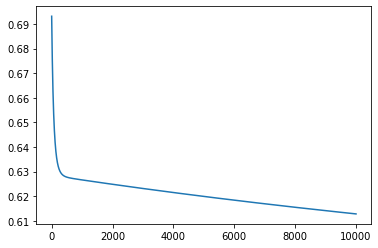

In [834]:
#plot showing cost with iterations:
plt.plot(np.arange(iterations), cost_history)
plt.show()

## **Task 4: Take any subject's knee angle and try to predict the knee angle for thenext gait cycle.**

In [881]:
import math
df = all_sheets[2]["df"]
knee_angle_values = df.iloc[1][1:].values.tolist()
knee_angle_values = [elem for elem in knee_angle_values if not math.isnan(elem)]

In [891]:
y = knee_angle_values
X = list(range(len(knee_angle_values)))
X = [[elem] for elem in X]

In [892]:
(slope, intercept, final_cost) = linear_regression(X, y, 0.00003, 1500)

In [893]:
print(slope)

0.4948432788906137


In [894]:
print(intercept)

0.0


In [895]:
final_cost

138.64843966398098

In [901]:
predicted_knee_angle = predict(X[-1][0]+1, [intercept, slope])

In [902]:
print("The predicted knee angle is:", predicted_knee_angle[1])

The predicted knee angle is: 24.742163944530684
